## Задача
### Необходимо автоматически анализировать функцию, заданную пользователем, и выполнять требуемые вычисления.
Рассмотрим на примере функции:
`f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30`

1. Определить корни
2. Найти интервалы, на которых функция возрастает
3. Найти интервалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки, на котором f > 0
7. Определить промежутки, на котором f < 0
<hr>

## Выполнение:
> Нахождение корней сложной функции, которая включает в себя тригонометрические и другие нелинейные операции, может быть нетривиальной задачей и требует использования численных методов.

##### Импортируем необходимые библиотеки

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.misc import derivative

##### Задаём функцию

In [54]:
# Определение функции
def f(x):
    return -12 * x**4 * np.sin(np.cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30

### 1. Определить корни
##### а) Подготовка начальных приближений и поиск корней функции:
<span style="color:cyan;"> Вы можете настроить диапазон `root_guesses` в зависимости от вашей конкретной функции. </span>

In [55]:
# Нахождение корней функции (приближенно)
root_guesses = np.linspace(-20, 20, 200)  # начальные приближения
roots = set()
for guess in root_guesses:
    root = fsolve(f, guess)[0]
    if np.isclose(f(root), 0):
        roots.add(root)
roots = np.array(list(roots))

print("Корни функции:", roots)

Корни функции: [  2.27305685   2.27305685   2.27305685   2.27305685   4.3835237
   4.3835237    4.3835237    4.3835237    4.3835237   -1.33896664
  -1.33896664   4.3835237    8.03516413  10.86064999  10.86064999
  10.86064999  14.24058481  14.24058481  14.24058481   4.3835237
   4.3835237    4.3835237    4.3835237   17.19284807  17.19284807
  -1.33896664  20.49260006  -7.65062229  -5.02686593  -5.02686593
  -5.02686593  -5.02686593  -1.33896664  -1.33896664   8.03516413
  -5.02686593  10.86064999  -1.33896664  14.24058481  -1.33896664
  -1.33896664   4.3835237   -1.33896664  -1.33896664  -7.65062229
  -7.65062229  -7.65062229  -1.33896664  -5.02686593  -5.02686593
  -5.02686593 -20.34559414 -17.36655251 -14.02805599 -14.02805599
 -14.02805599 -11.13376906 -11.13376906 -11.13376906 -11.13376906
  -7.65062229 -11.13376906  -5.02686593 -11.13376906  -1.33896664]


### 2. Найти интервалы, на которых функция возрастает
### 3. Найти интервалы, на которых функция убывает
Найдем интервалы возрастания и убывания функции:

In [56]:
# Поиск интервалов возрастания и убывания функции
critical_points = roots.copy()
critical_points = np.append(
    critical_points, root_guesses
)  # добавляем начальные приближения для поиска критических точек

increasing_intervals = []
decreasing_intervals = []

for i in range(len(critical_points) - 1):
    mid_point = (critical_points[i] + critical_points[i + 1]) / 2
    # Функция derivative из модуля scipy.misc объявлена устаревшей в версии SciPy 1.10.0 и будет полностью удалена в версии 1.12.0
    if derivative(f, mid_point, dx=1e-6) > 0:
        increasing_intervals.append((critical_points[i], critical_points[i + 1]))
    else:
        decreasing_intervals.append((critical_points[i], critical_points[i + 1]))

print("Интервалы возрастания:", increasing_intervals)
print("Интервалы убывания:", decreasing_intervals)


Интервалы возрастания: [(2.2730568457562486, 2.2730568457562446), (2.2730568457562446, 2.273056845756252), (2.273056845756252, 2.273056845756283), (2.273056845756283, 4.38352369796896), (8.035164133413524, 10.860649989594162), (14.240584810251637, 14.24058481025163), (14.24058481025163, 14.240584810251645), (14.240584810251645, 4.383523697969013), (17.192848070045066, -1.3389666392771082), (-1.3389666392771082, 20.492600063216873), (-7.650622285132756, -5.026865928206203), (-5.026865928206203, -5.026865928206674), (-5.026865928206674, -5.026865928206209), (-5.026865928206209, -5.0268659282062105), (-1.338966639277124, 8.03516413341351), (-5.026865928206305, 10.860649989594183), (-1.338966639277118, -7.650622285132757), (-7.650622285132712, -1.3389666392771233), (-5.026865928206204, -5.026865928206499), (-5.026865928206499, -5.026865928206364), (-5.026865928206364, -20.345594135942548), (-20.345594135942548, -17.366552506907745), (-14.028055991662342, -11.133769061035775), (-11.13376906

C:\Users\user\AppData\Local\Temp\ipykernel_8188\3177627848.py:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  if derivative(f, mid_point, dx=1e-6) > 0:


### <span style="color:red;"> !!! **ВНИМАНИЕ** !!!</span>
Функция `derivative` из модуля `scipy.misc` объявлена устаревшей в версии **SciPy 1.10.0** и будет полностью удалена в версии **1.12.0.** </br>Это означает, что в будущих версиях **SciPy** вы не сможете использовать эту функцию, и вам нужно будет найти альтернативный способ вычисления производной функции.

- Будем использовать новый пакет для вычисления производной. Используем `findiff`:

In [57]:
from findiff import FinDiff

In [58]:
critical_points = roots.copy()
critical_points = np.append(critical_points, root_guesses)

# Сортируем критические точки
critical_points.sort()

# Определяем шаг dx для вычисления производной
dx = 1e-6

# Создаем объект FinDiff для вычисления первой производной по x
d_dx = FinDiff(0, dx, 1)

increasing_intervals = []
decreasing_intervals = []

# Теперь создадим массив точек для вычисления значений функции
x_values = np.linspace(min(critical_points), max(critical_points), num=1000)
y_values = f(x_values)

for i in range(len(critical_points) - 1):
    mid_point = (critical_points[i] + critical_points[i + 1]) / 2

    # Найдем ближайший индекс к mid_point в массиве x_values
    idx = np.argmin(np.abs(x_values - mid_point))

    # Вычисляем значение производной в ближайшей точке к mid_point
    derivative_at_mid_point = d_dx(y_values)[idx]

    if derivative_at_mid_point > 0:
        increasing_intervals.append((critical_points[i], critical_points[i + 1]))
    else:
        decreasing_intervals.append((critical_points[i], critical_points[i + 1]))

print("Интервалы возрастания:", [(f"{interval[0]:.2f}", f"{interval[1]:.2f}") for interval in increasing_intervals])
print("Интервалы убывания:", [(f"{interval[0]:.2f}", f"{interval[1]:.2f}") for interval in decreasing_intervals])

Интервалы возрастания: [('-19.20', '-18.99'), ('-18.99', '-18.79'), ('-18.79', '-18.59'), ('-18.59', '-18.39'), ('-18.39', '-18.19'), ('-18.19', '-17.99'), ('-17.99', '-17.79'), ('-17.79', '-17.59'), ('-17.59', '-17.39'), ('-17.39', '-17.37'), ('-17.37', '-17.19'), ('-17.19', '-16.98'), ('-16.98', '-16.78'), ('-16.78', '-16.58'), ('-16.58', '-16.38'), ('-16.38', '-16.18'), ('-16.18', '-15.98'), ('-12.96', '-12.76'), ('-12.76', '-12.56'), ('-12.56', '-12.36'), ('-12.36', '-12.16'), ('-12.16', '-11.96'), ('-11.96', '-11.76'), ('-11.76', '-11.56'), ('-11.56', '-11.36'), ('-11.36', '-11.16'), ('-11.16', '-11.13'), ('-11.13', '-11.13'), ('-11.13', '-11.13'), ('-11.13', '-11.13'), ('-11.13', '-11.13'), ('-11.13', '-11.13'), ('-11.13', '-10.95'), ('-10.95', '-10.75'), ('-10.75', '-10.55'), ('-10.55', '-10.35'), ('-10.35', '-10.15'), ('-10.15', '-9.95'), ('-6.93', '-6.73'), ('-6.73', '-6.53'), ('-6.53', '-6.33'), ('-6.33', '-6.13'), ('-6.13', '-5.93'), ('-5.93', '-5.73'), ('-5.73', '-5.53'), (

### 4. Построить график

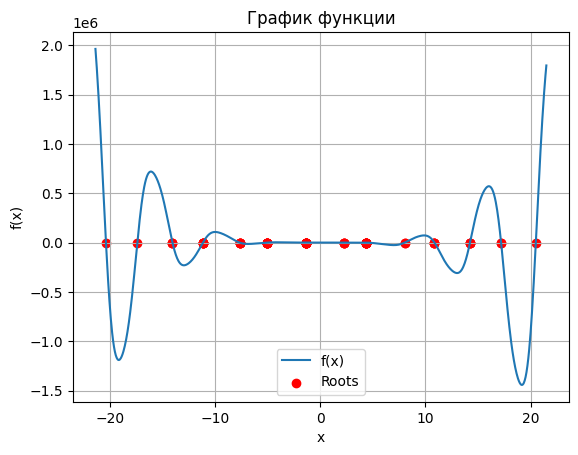

In [59]:
# Построение графика функции
x_values = np.linspace(min(critical_points) - 1, max(critical_points) + 1, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values, label="f(x)")
plt.scatter(roots, f(roots), color="red", label="Roots")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("График функции")
plt.grid(True)
plt.legend()
plt.show()

### 5. Вычислить вершину
##### Часть 1, если функция квадратичная

In [62]:
# Нахождение вершины (если функция квадратичная)
if len(roots) == 2:
    vertex_x = (roots[0] + roots[1]) / 2
else:
    vertex_x = roots[0] if len(roots) == 1 else None
vertex_y = f(vertex_x) if vertex_x is not None else None
vertex = (vertex_x, vertex_y)

print("Вершина функции:", vertex)

Вершина функции: (None, None)


##### Часть 2, для нелинейных функций поиск экстремумов (вершин)

In [63]:
# Вычисление первой и второй производной
def first_derivative(x):
    return derivative(f, x, dx=1e-6)


def second_derivative(x):
    return derivative(f, x, dx=1e-6, n=2)


# Находим критические точки (где первая производная равна нулю)
critical_points = []
x_values = np.linspace(-20, 20, 1000)
for i in range(1, len(x_values)):
    if np.sign(first_derivative(x_values[i - 1])) != np.sign(
        first_derivative(x_values[i])
    ):
        # Используем метод бисекции для уточнения корня
        root = fsolve(first_derivative, x_values[i])[0]
        if root not in critical_points:
            critical_points.append(root)

# Анализируем вторую производную в критических точках
extrema = []
for x in critical_points:
    if second_derivative(x) > 0:
        extrema.append((x, f(x), "minimum"))
    elif second_derivative(x) < 0:
        extrema.append((x, f(x), "maximum"))

# Выводим найденные экстремумы
for extremum in extrema:
    print(
        f"Экстремум в x={extremum[0]:.4f}: значение функции f(x)={extremum[1]:.4f}, тип: {extremum[2]}"
    )

C:\Users\user\AppData\Local\Temp\ipykernel_8188\470727179.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f, x, dx=1e-6)
C:\Users\user\AppData\Local\Temp\ipykernel_8188\470727179.py:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f, x, dx=1e-6, n=2)


Экстремум в x=-19.1307: значение функции f(x)=-1189754.5923, тип: minimum
Экстремум в x=-16.0805: значение функции f(x)=719825.6834, тип: maximum
Экстремум в x=-12.9438: значение функции f(x)=-230229.4795, тип: minimum
Экстремум в x=-9.9790: значение функции f(x)=107678.0416, тип: maximum
Экстремум в x=-6.8314: значение функции f(x)=-13820.5349, тип: minimum
Экстремум в x=-4.1678: значение функции f(x)=3111.3632, тип: maximum
Экстремум в x=-0.3927: значение функции f(x)=-32.2936, тип: minimum
Экстремум в x=0.4546: значение функции f(x)=-26.5127, тип: maximum
Экстремум в x=1.7006: значение функции f(x)=-74.1063, тип: minimum
Экстремум в x=3.8193: значение функции f(x)=872.2558, тип: maximum
Экстремум в x=7.0010: значение функции f(x)=-25610.5097, тип: minimum
Экстремум в x=9.8771: значение функции f(x)=72634.6641, тип: maximum
Экстремум в x=13.0123: значение функции f(x)=-308672.3376, тип: minimum
Экстремум в x=16.0315: значение функции f(x)=571130.1737, тип: maximum
Экстремум в x=19.16

### <span style="color:red;"> !!! **ВНИМАНИЕ** !!!</span>
Функция `derivative` из модуля `scipy.misc` объявлена устаревшей в версии **SciPy 1.10.0** и будет полностью удалена в версии **1.12.0.** </br>Это означает, что в будущих версиях **SciPy** вы не сможете использовать эту функцию, и вам нужно будет найти альтернативный способ вычисления производной функции.

- Используем `numdifftools`, который предоставляет алгоритмы для оценки градиентов (первой производной), Гессиана (второй производной) и Якобиана с автоматическим выбором шага.

In [67]:
import numdifftools as nd

In [68]:
# Создание объектов для вычисления первой и второй производной
f_prime = nd.Derivative(f, n=1)
f_double_prime = nd.Derivative(f, n=2)

# Находим критические точки (где первая производная равна нулю)
critical_points = []
x_values = np.linspace(-20, 20, 1000)
for i in range(1, len(x_values)):
    if np.sign(f_prime(x_values[i - 1])) != np.sign(f_prime(x_values[i])):
        # Используем метод бисекции для уточнения корня
        root = fsolve(f_prime, x_values[i])[0]
        if root not in critical_points:
            critical_points.append(root)

# Анализируем вторую производную в критических точках
extrema = []
for x in critical_points:
    if f_double_prime(x) > 0:
        extrema.append((x, f(x), "minimum"))
    elif f_double_prime(x) < 0:
        extrema.append((x, f(x), "maximum"))

# Выводим найденные экстремумы
for extremum in extrema:
    print(
        f"Экстремум в x={extremum[0]:.4f}: значение функции f(x)={extremum[1]:.4f}, тип: {extremum[2]}"
    )

Экстремум в x=-19.1307: значение функции f(x)=-1189754.5923, тип: minimum
Экстремум в x=-16.0805: значение функции f(x)=719825.6834, тип: maximum
Экстремум в x=-12.9438: значение функции f(x)=-230229.4795, тип: minimum
Экстремум в x=-9.9790: значение функции f(x)=107678.0416, тип: maximum
Экстремум в x=-6.8314: значение функции f(x)=-13820.5349, тип: minimum
Экстремум в x=-4.1678: значение функции f(x)=3111.3632, тип: maximum
Экстремум в x=-0.3927: значение функции f(x)=-32.2936, тип: minimum
Экстремум в x=0.4546: значение функции f(x)=-26.5127, тип: maximum
Экстремум в x=1.7006: значение функции f(x)=-74.1063, тип: minimum
Экстремум в x=3.8193: значение функции f(x)=872.2558, тип: maximum
Экстремум в x=7.0010: значение функции f(x)=-25610.5097, тип: minimum
Экстремум в x=9.8771: значение функции f(x)=72634.6641, тип: maximum
Экстремум в x=13.0123: значение функции f(x)=-308672.3376, тип: minimum
Экстремум в x=16.0315: значение функции f(x)=571130.1737, тип: maximum
Экстремум в x=19.16

### 6. Определить промежутки, на котором f > 0
### 7. Определить промежутки, на котором f < 0

Определим промежутки, на которых функция принимает положительные и отрицательные значения:

In [73]:
# Определение промежутков, на которых f > 0 и f < 0
positive_intervals = []
negative_intervals = []

for i in range(len(critical_points) - 1):
    mid_point = (critical_points[i] + critical_points[i + 1]) / 2
    if f(mid_point) > 0:
        positive_intervals.append((critical_points[i], critical_points[i + 1]))
    elif f(mid_point) < 0:
        negative_intervals.append((critical_points[i], critical_points[i + 1]))

#print("Интервалы возрастания:", [(f"{interval[0]:.2f}", f"{interval[1]:.2f}") for interval in increasing_intervals])
#print("Интервалы убывания:", [(f"{interval[0]:.2f}", f"{interval[1]:.2f}") for interval in decreasing_intervals])

print("Промежутки, на которых f > 0:", [(f"{interval[0]:.2f}", f"{interval[1]:.2f}") for interval in positive_intervals])
print("Промежутки, на которых f < 0:", [(f"{interval[0]:.2f}", f"{interval[1]:.2f}") for interval in negative_intervals])

Промежутки, на которых f > 0: [('-16.08', '-12.94'), ('-9.98', '-6.83'), ('-4.17', '-0.39'), ('1.70', '3.82'), ('7.00', '9.88'), ('13.01', '16.03')]
Промежутки, на которых f < 0: [('-19.13', '-16.08'), ('-12.94', '-9.98'), ('-6.83', '-4.17'), ('-0.39', '0.45'), ('0.45', '1.70'), ('3.82', '7.00'), ('9.88', '13.01'), ('16.03', '19.17')]


#### 8. Общий график с отображением точек корней и экстремумов

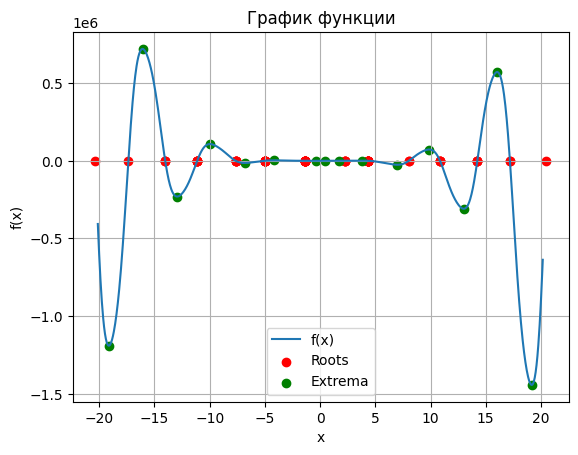

In [75]:
# Построение графика функции
x_values = np.linspace(min(critical_points) - 1, max(critical_points) + 1, 1000)
y_values = f(x_values)

# Построение основного графика функции
plt.plot(x_values, y_values, label="f(x)")

# Отображаем корни функции красными точками
plt.scatter(roots, f(roots), color="red", label="Roots")

# Извлечение координат точек экстремумов для отображения на графике
extrema_x = [point[0] for point in extrema]
extrema_y = [point[1] for point in extrema]

# Отображаем точки экстремумов зелеными точками
plt.scatter(extrema_x, extrema_y, color="green", label="Extrema")

# Добавление меток осей, заголовка, сетки и легенды
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("График функции")
plt.grid(True)
plt.legend()

# Отображение графика
plt.show()

<hr>
p.s. Спасибо большое! Очень интересное задание!